# Activité : Allez plus loin dans la prédiction de loyer

## Phase 1 : importation & description des données

In [1]:
# On importe les librairies dont on a besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
# On importe notre jeu de données et on le stock dans un dataframe
# On crée un sous-ensemble qui filtre les "outliers" (prix trop élevés),
# le seuil fixé est arbitraire et résulte d'un travail d'observation approfondi du jeu de données
# On drop aussi les NaN afin de nettoyer notre dataframe 
house_data_raw = pd.read_csv('house_data.csv')
house_data_select = house_data_raw.dropna(axis=0, how='any')
house_data_select2 = house_data_select[house_data_select['price'] < 7000]


# Shape du dataset brut (row, column)
print("Taille du dataset brut : {}".format(house_data_raw.shape))
# Shape du dataset sans les NaN 
print("Taille du dataset sans les NaN : {}".format(house_data_select.shape))

Taille du dataset brut : (827, 3)
Taille du dataset sans les NaN : (822, 3)


In [3]:
# On en profite pour dresser un petit bilan de statistiques descriptives du jeu de données "brut"
house_data_raw.describe()
# Vous pouvez décommenter la ligne ci-dessous si vous désirez dresser le bilan à partir du sous-ensemble
# house_data_select2.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


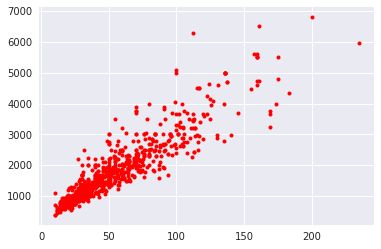

In [4]:
# Réalisation d'un première visualisation des données qui nous intéressent, pour le moment on évolue en contexte bivarié
# avec les deux variables suivantes : la surface en mètre carré, et le prix en euros
plt.plot(house_data_select2['surface'], house_data_select2['price'], 'ro', markersize=4)
plt.show()

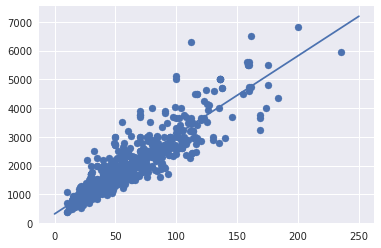

In [5]:
# Réalisation d'une première régression linéaire "baseline" sans training & testing sets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Création des variables à traiter
x = house_data_select2['surface']
y = house_data_select2['price']
# Intégration du modèle de régression linéaire
model = LinearRegression(fit_intercept=True)
# On applique les variables définies plus haut, à notre modèle
model.fit(x[:, np.newaxis], y)
# On crée les axes xfit et yfit pour tracer la droite
xfit = np.linspace(0, 250)
yfit = model.predict(xfit[:, np.newaxis])
# Pour terminer on produit le graphique avec le nuage de données et la droite de la régression linéaire 
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Phase 2 : travail du modèle

### Premier modèle : réalisation de la régression linéaire avec une feature

Score du r2 sur le training set : 0.825223
Score du r2 sur le testing set : 0.855514
###################################################################################################################
- Scores de la validation croisée avec 10 folds : [0.97472176 0.62751285 0.84629669 0.7541655  0.82630897 0.73785756
 0.88334264 0.88128941 0.73715967 0.82063986]
- La moyenne de la validation croisée est : 0.8089294930361192 


/home/adil/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


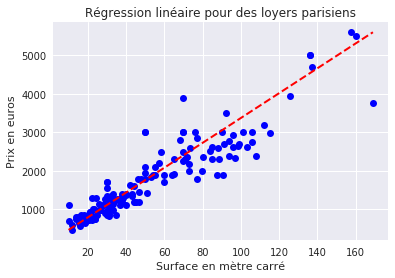

In [6]:
# Réalisation d'une régression linéaire avec une feature, et en intégrant une séparation de sets
# On importe ici les différentes fonctions dont on aura besoin   
from sklearn import linear_model, cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

x = np.matrix([np.ones(house_data_select2.shape[0]), house_data_select2['surface']]).T
y = np.matrix(house_data_select2['price']).T

# Vous pouvez ici tester ce modèle avec deux features en décommentant la ligne ci-dessous
# x = np.matrix([np.ones(house_data_select2.shape[0]), house_data_select2['surface'], house_data_select2['arrondissement']]).T

'''On sépare le dataset en training et testing sets, à noter que le paramètre random_state nous sert ici à "figer"
   la randomisation des sets qui ne sont désormais tirés qu'une seule fois.
   Celà nous permet d'avoir un point de comparaison pour évaluer les deux modèles que l'on veut ici confronter.
   On pourra ainsi sélectionner en fin d'activité celui qui nous semble être optimal.
'''
# Séparation des sets et fixation du paramètre random_state
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=42)
# Implentation du modèle de régression linéaire 
model = LinearRegression()
# Entrainement du modèle avec les training sets 
model.fit(Xtrain, ytrain)
# Prédiction en appliquant le modèle entrainé au testing set 
predict1 = model.predict(Xtest)

# Petit "hack", j'avais du mal à retrouver la graduation en mètre carré pour les abscisses...
# J'ai donc essayé de résoudre le problème avec numpy en réduisant la dimension des numpy arrays
xtest_2d =  Xtest[:, 1]
# Convertir les numpy 2D array into numpy 1D array
xtest_flat = xtest_2d.flatten()
xtest_flat2 = np.ravel(xtest_flat)

# On produit une visualisation des résultats obtenus en ajoutant un titre et des labels au graphique
plt.plot(xtest_flat2, ytest, 'ro', color='blue')
plt.plot([xtest_flat2.min(), xtest_flat2.max()], [ytest.min(), ytest.max()],'k--', lw=2, c='r')
plt.title('Régression linéaire pour des loyers parisiens')
plt.xlabel('Surface en mètre carré')
plt.ylabel('Prix en euros')

###########################################################################
##                 Rapport d'évaluation du premier modèle                ##
###########################################################################

# On évalue le modèle à partir de la métrique du R2 en comparant les résultats obtenus avec le training et testing sets

pred_train = model.predict(Xtrain)
print("Score du r2 sur le training set : %f" % r2_score(ytrain, pred_train))

pred_test = model.predict(Xtest)
print("Score du r2 sur le testing set : %f" % r2_score(ytest, pred_test))

print('###################################################################################################################')
# Pour terminer on intégre une "amélioration" de l'évaluation du modèle avec une validation croisée
# La validation croisée permet de mieux évaluer la performance d'un modèle en :
# - découpant le testing set en plusieurs parties (folds)
# - moyennant l'erreur du modèle en fonction du nombre total de folds choisis
# On définit un nombre de folds nommés ici k
k = 10
# On réalise la validation croisée sur notre testing set
scores = cross_val_score(model, predict1, ytest, cv=k)
print("- Scores de la validation croisée avec {} folds : {}".format(k, scores))
# On affiche la moyenne des résultats obtenus sur l'ensemble de cette validation croisée
print("- La moyenne de la validation croisée est : {} ".format(scores.mean()))

### Premier modèle : optimisation du nombre de folds de la validation croisée

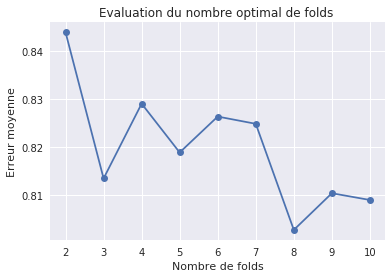

- Scores de la validation croisée avec 2 folds : [0.82734789 0.8605454 ]
- La moyenne de la validation croisée est : 0.8439466452333111 


In [7]:
# Ici on cherche à définir le nombre optimal de folds pour la validation croisée
krange = range(2, 11)
errors = []
dico = {'fold': [], 'erreur': errors}
for i in krange:
    errors.append(cross_val_score(model, Xtest, ytest, cv=i).mean())
    dico['fold'].append(i)
    
plt.plot(krange, errors, 'o-')
plt.title('Evaluation du nombre optimal de folds ')
plt.xlabel('Nombre de folds')
plt.ylabel('Erreur moyenne')
plt.show()

# On remarque donc ici d'après le graphique que le nombre optimal de folds est 2

# Les trois lignes de code qui suivent servent à retrouver le fold optimal k dans notre dataframe df_err
# df_err est le dataframe qui regroupe l'erreur moyenne pour chaque fold, ainsi que ces-derniers
df_err = pd.DataFrame(dico)
err_max = df_err.loc[df_err['erreur'].idxmax()]
k = int(err_max[1])
# On relance donc une seconde validation croisée avec le nombre de folds optimal
scores = cross_val_score(model, Xtest, ytest, cv=k)
print("- Scores de la validation croisée avec {} folds : {}".format(k, scores))
# On affiche la moyenne des résultats obtenus sur l'ensemble de cette validation croisée
print("- La moyenne de la validation croisée est : {} ".format(scores.mean()))
## Attention, prendre un nombre aussi réduit (il correspond à la limite basse du nombre de folds autorisés par la
## méthode des KFolds), n'est pas forcément une bonne pratique en machine learning (elle constitue une "biais" analytique).
## C'est pourquoi il convient de choisir un nombre de folds plus conséquent comme 7 ou 10 (10 étant une norme que l'on
## peut parfois observer en machine learning) par exemple.

# Variable qui regroupe l'ensemble des erreurs moyennes pour chacun des folds pour le premier modèle
# Elle sera utilisée pour la partie intitulée "Phase finale" du notebook
all_err_m1 = [i for i in df_err['erreur']]

### Second modèle : réalisation de la régression linéaire avec deux features et deux nouveaux filtres

Score du r2 sur le training set : 0.855759
Score du r2 sur le testing set : 0.854695
####################################################################################################################
- Scores de la validation croisée avec 10 folds : [0.80348577 0.67859395 0.76492741 0.72349645 0.89233061 0.80104038
 0.93078024 0.92163361 0.86285824 0.76809922]
- La moyenne de la validation croisée est : 0.8147245870185686 


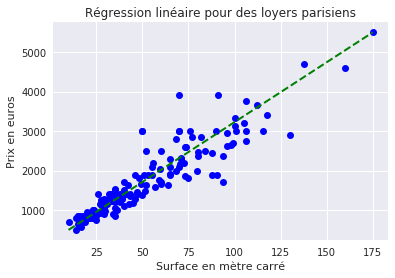

In [8]:
# Réalisation d'une régression linéaire avec :
# - deux features
# - une séparation de sets
# - deux filtres afin de retirer des outliers pour améliorer le modèle

# Ré-import des données et dropping des NaN
house_data_raw = pd.read_csv('house_data.csv')
h_data_raw = house_data_raw.dropna(axis=0, how='any')

# On intègre ici les deux filtres qui nous intéressent
# La méthodologie de filtrage est analogue à celle utilisée à la deuxième cellule de ce notebook 
# (arbitrage par observation)

house_data_select1 = h_data_raw[(h_data_raw['surface'] < 180) & (h_data_raw['price'] < 6000)]

# Vous pouvez ici tester ce modèle avec deux features en décommentant la ligne ci-dessous
# x1 = np.matrix([np.ones(house_data_select2.shape[0]), house_data_select2['surface']]).T
# y1 = np.matrix(house_data_select2['price']).T

# Ici on intègre donc bien les deux features : surface et arrondissement.
# Ces-dernières seront étudiées en fonction de la variable y correspondant au prix (price)
x1 = np.matrix([np.ones(house_data_select1.shape[0]), house_data_select1['surface'], house_data_select1['arrondissement']]).T
y1 = np.matrix(house_data_select1['price']).T

Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(x1, y1, train_size=0.8, random_state=42)

model_m2 = LinearRegression()

model_m2.fit(Xtrain_2, ytrain_2)

predict1_m2 = model_m2.predict(Xtest_2)

# Petit "hack", j'avais du mal à retrouver la graduation en mètre carré pour les abscisses...
# J'ai donc essayé de résoudre le problème avec numpy en réduisant la dimension des numpy arrays
xtest_2d_m2 =  Xtest_2[:, 1]
# Convertir les numpy 2D array into numpy 1D array
pred_1d_m2 = predict1_m2.flatten()
xtest_flat_m2 = xtest_2d_m2.flatten()
xtest_flat2_m2 = np.ravel(xtest_flat_m2)

plt.plot(xtest_flat2_m2, ytest_2, 'ro', color='blue')
plt.plot([xtest_flat2_m2.min(), xtest_flat2_m2.max()], [ytest_2.min(), ytest_2.max()],'k--', lw=2, c='green')

plt.title('Régression linéaire pour des loyers parisiens')
plt.xlabel('Surface en mètre carré')
plt.ylabel('Prix en euros')

###########################################################################
##                 Rapport d'évaluation du second modèle                 ##
###########################################################################

# On évalue le modèle à partir de la métrique du R2 en comparant les résultats obtenus avec le training et testing sets

pred_train_2 = model_m2.predict(Xtrain_2)
print("Score du r2 sur le training set : %f" % r2_score(ytrain_2, pred_train_2))

pred_test_2 = model_m2.predict(Xtest_2)
print("Score du r2 sur le testing set : %f" % r2_score(ytest_2, pred_test_2))

print('####################################################################################################################')
# Pour terminer on intégre une "amélioration" de l'évaluation du modèle avec une validation croisée
# La validation croisée permet de mieux évaluer la performance d'un modèle en :
# - découpant le testing set en plusieurs parties (folds)
# - moyennant l'erreur du modèle en fonction du nombre total de folds choisis
# On définit un nombre de folds nommés ici k
k_m2 = 10
# On réalise la validation croisée sur notre testing set
scores_m2 = cross_val_score(model_m2, predict1_m2, ytest_2, cv=k_m2)
print("- Scores de la validation croisée avec {} folds : {}".format(k_m2, scores_m2))
# On affiche la moyenne des résultats obtenus sur l'ensemble de cette validation croisée
print("- La moyenne de la validation croisée est : {} ".format(scores_m2.mean()))

### Second modèle : optimisation du nombre de folds de la validation croisée

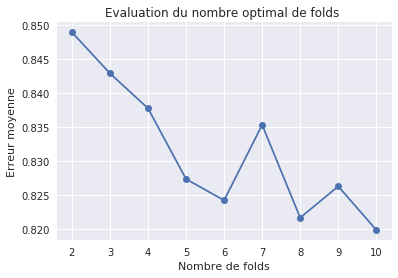

- Scores de la validation croisée avec 2 folds : [0.80566354 0.89231386]
- La moyenne de la validation croisée est : 0.8489886980307251 


In [9]:
# Ici on cherche à définir le nombre optimal de folds pour la validation croisée
krange_m2 = range(2, 11)
errors_m2 = []
dico_m2 = {'fold': [], 'erreur': errors_m2}
for i in krange_m2:
    errors_m2.append(cross_val_score(model_m2, Xtest_2, ytest_2, cv=i).mean())
    dico_m2['fold'].append(i)
    
plt.plot(krange_m2, errors_m2, 'o-')
plt.title('Evaluation du nombre optimal de folds ')
plt.xlabel('Nombre de folds')
plt.ylabel('Erreur moyenne')
plt.show()

# On remarque donc ici d'après le graphique que le nombre optimal de folds est 2

# Les trois lignes de code qui suivent servent à retrouver le fold optimal k dans notre dataframe df_err
# df_err est le dataframe qui regroupe l'erreur moyenne pour chaque fold, ainsi que ces-derniers
df_err_m2 = pd.DataFrame(dico_m2)
err_max_m2 = df_err_m2.loc[df_err_m2['erreur'].idxmax()]
k_m2 = int(err_max_m2[1])
# On relance donc une seconde validation croisée avec le nombre de folds optimal
scores_m2 = cross_val_score(model_m2, Xtest_2, ytest_2, cv=k_m2)
print("- Scores de la validation croisée avec {} folds : {}".format(k_m2, scores_m2))
# On affiche la moyenne des résultats obtenus sur l'ensemble de cette validation croisée
print("- La moyenne de la validation croisée est : {} ".format(scores_m2.mean()))
## Attention, prendre un nombre aussi réduit (il correspond à la limite basse du nombre de folds autorisés par la
## méthode des KFolds), n'est pas forcément une bonne pratique en machine learning (elle constitue une "biais" analytique).
## C'est pourquoi il convient de choisir un nombre de folds plus conséquent comme 7 ou 10 (10 étant une norme que l'on
## peut parfois observer en machine learning) par exemple.

# Variable qui regroupe l'ensemble des erreurs moyennes pour chacun des folds pour le second modèle
# Elle sera utilisée pour la partie intitulée "Phase finale" du notebook
all_err_m2 = [i for i in df_err_m2['erreur']]

## Phase finale : séléction du modèle final

Au vue de l'ensemble des mesures de performances, le modèle final séléctionné correspond au **second modèle**.

En effet voici le bilan des performances :

### Bilan des performances

In [10]:
# On dresse ici le bilan des rapports d'erreurs pour les model 1 et model 2 en fonction du nombre de folds

# On crée une liste qui regroupe toutes les étiquettes de l'index de notre futur dataframe
nb = range(2, 11)
lise = []
for i in nb:
    lise.append('erreur_{}CV'.format(i))

# Création de notre rapport d'erreurs qui prend la forme d'un dataframe
df_rapport = pd.DataFrame({'Modèle 1': all_err_m1, 'Modèle 2': all_err_m2}, index=lise)

# Print n'est pas utilisé ici car le notebook affiche le dataframe de manière plus esthétique à mon sens ;) 
df_rapport

,Modèle 1,Modèle 2
erreur_2CV,0.843947,0.848989
erreur_3CV,0.813422,0.842922
erreur_4CV,0.829034,0.837766
erreur_5CV,0.818846,0.827334
erreur_6CV,0.826344,0.824191
erreur_7CV,0.824830,0.835327
erreur_8CV,0.802678,0.821628
erreur_9CV,0.810336,0.826260
erreur_10CV,0.808929,0.819830


In [11]:
# ATTENTION !!! On rappelle ici que pour évaluer la performance des différents modèles 
# nous avons choisi un nombre de folds correspondant à 10CV
print(df_rapport.loc['erreur_10CV'])

Modèle 1    0.808929
Modèle 2    0.819830
Name: erreur_10CV, dtype: float64


**_N.B :_** 
- On voit donc bien ici qu'en tendance lourde ("qu'importe le nombre de folds choisis"), notre second modèle donnera toujours (dans ce cas de figure) un score plus élevé que celui qui est produit par le premier modèle.

 Ce score correspond au **R2** qui est aussi appelé **coefficient de détermination** :
 https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination


- Une exception reste à noter pour le cas de 6 folds où paradoxalement le modèle 1 semble légèrement plus performant que
 le modèle final !

In [12]:
df_rapport.loc['erreur_6CV']

Modèle 1    0.826344
Modèle 2    0.824191
Name: erreur_6CV, dtype: float64

### Les améliorations appliquées

Voici les améliorations que nous avons intégré pour ce second modèle :
- **Extension d'une seconde feature pour x :**

    La variable de base étant la "surface", nous avons ajouté celle de l'"arrondissement". 

    Nous totalisons ainsi un ensemble de deux features pour x.
    
    
    
- **Filtrage avancé appliqué à l'ensemble de ces deux features.**

  1 - La variable "surface" a été restreinte aux appartements possédant une surface totale inférieure à 180 m².
  
  2 - La variable "price" a été réduite aux appartements ayant un loyer inférieur à 6 000 euros par mois.
  
  
- **Intégration d'une validation croisée avec moyennisation de l'erreur globale (en fonction du nombre de folds choisis)**


**_N.B :_** 

Les filtrages bien que drastiques, ne semblent pas aggraver le risque d'_overfitting_. 

En effet on a réduit une certaine quantité d'_outliers_ mais à des fins purement socio-économiques.

Statistiquement les appartements de plus de 6 000 euros sont de manière empirique plus souvent associés à des surfaces élevés. 

Qui plus est, ils demeurent relativement minoritaires au sein de notre _dataset_ comme peut le montrer la briève 
description statistique suivante :

In [13]:
# Démonstration de statistique de l'influence des filtres 
house_data_raw = pd.read_csv('house_data.csv')
h_data_raw = house_data_raw.dropna(axis=0, how='any')


######################################################
#               Filtres séparés                      #
######################################################

# Décommenter les lignes suivantes pour étudier les filtres séparémemt 

# Premier filtre qui concerne la variable surface
# h_surface_top = h_data_raw[h_data_raw['surface'] >= 180]
# x_hst = len(h_surface_top)

# Premier filtre qui concerne la variable price
# h_price_top = h_data_raw[h_data_raw['price'] >= 6000]
# x_hpt = len(h_price_top)

# Permet ici de comparer les éléments communs aux deux filtres
# xxx = h_price_top.isin(h_surface_top)
# yyy = h_surface_top.isin(h_price_top)


######################################################
#           Filtres optimisés (cas utilisé)          #
######################################################


# "House data surface and price top (hdspt)"
hdspt = h_data_raw[(h_data_raw['surface'] >= 180) & (h_data_raw['price'] >= 6000)]
print("Nombre d'appartements : {}".format(len(hdspt)))

effectif_filtre = len(hdspt)
effectif_total = len(h_data_raw)
proportion = (effectif_filtre / effectif_total) * 100

print("Proportion des appartements filtrés par rapport au dataset de départ : {}%".format(round(proportion)))
# Pour avoir la valeur exacte utiliser plutôt : .format(proportion)


Nombre d'appartements : 13
Proportion des appartements filtrés par rapport au dataset de départ : 2%


**_N.B :_**

La proportion ici correspond à la comparaison de l'effectif total des appartements auxquels on a appliqué
les filtres, par rapport à l'effectif total du _dataset_.

In [14]:
# Estimation de la proportion du montant total de la variable "price" (prix) du sous-ensemble filtré 
# en comparaison avec celui issu du dataset initial 
xpf = sum(hdspt['price'])
xp = sum(h_data_raw['price'])

pp = (xpf / xp) * 100
print("{} %".format(pp))

# On voit bien ici que même s'ils ne représentent que 2% du corpus initial (en terme d'effectif), 
# ces appartements représentent environ 10% du montant total des loyers de ce même dataset de départ !

10.31061343248176 %


In [15]:
# Estimation de la proportion de la variable "surface" du sous-ensemble filtré 
# en comparaison avec le dataset initial 
xsf = sum(hdspt['surface'])
xs = sum(h_data_raw['surface'])

pp2 = (xsf / xs) * 100
print("{} %".format(pp2))
# On applique la même logique que précédemment, sauf qu'ici ces appartements 
# représentent environ 7% des surfaces totales des loyers du dataset de départ.

7.339603363810218 %


### Conclusion

On voit donc que, bien que ces filtres recrutent une proportion très faible d'observations (effectifs) qui est d'environ
**2% de la taille totale du jeu de données**, ces derniers ont une influence bien plus considérable sur le dataset que 
nous avons ici traité. 
(influence étant de facteur 4 ou 5 par rapport à l'effectif qu'ils réunissent face au dataset "brut" de départ).

C'est pourquoi nous avons considéré ici ces éléments comme des _outliers_ car se sont des **valeurs atypiques** qui pourraient biaiser notre analyse.

Par la suite on pourrait désormais utiliser la fonction predict() de sklearn pour établir des prédictions 
à partir de la généralisation du modèle pour un autre échantillon donné.

_Exemple fictif :_ 

_Autre dataset de 200 appartements avec en entrée une surface donnée pour chacun de ces-derniers,
sans oublier aussi l'arrondissement si l'on souhaite se calquer sur le modèle 2._

_A noter qu'il suffit ici de réduire le nombre de feature afin d'adapter le modèle final à nos besoins. Un retravail du modèle peut alors s'avérer nécessaire dans ce cas de figure._ 

### Annexe : tableaux de statistiques descriptives

In [16]:
# Statistiques descriptives appliquées au dataframe ayant des filtres actifs
# Version "exacte"
hdspt.describe()
# Version arrondie
# round(hdspt.describe(), 1)

,price,surface,arrondissement
count,13.000000,13.000000,13.000000
mean,13106.153846,269.384615,1.923077
std,5599.976992,88.557456,1.441153
min,6800.000000,180.000000,1.000000
25%,7450.000000,182.000000,1.000000
50%,14300.000000,230.000000,1.000000
75%,15000.000000,347.000000,4.000000
max,25000.000000,415.000000,4.000000


In [17]:
# Statistiques descriptives appliquées au dataframe brut
# Version exacte
h_data_raw.describe()
# Version arrondie
# round(h_data_raw.describe(), 1)

,price,surface,arrondissement
count,822.000000,822.000000,822.000000
mean,2010.306569,58.045925,4.142336
std,1895.091794,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1052.500000,28.655000,2.000000
50%,1564.500000,46.100000,3.000000
75%,2348.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000
